# Homework 1: Problems
### PHYS T480/580, Fall 2018
https://github.com/gtrichards/PHYS_T480_F18/


## Problem 1

Practice your git and github skills by submitting this homework via github:

* Clone the class github repository to your computer, the one at https://github.com/gtrichards/PHYS_T480_F18/  (should already have done this).
* Click the Github Classroom link you received via the mailing list. This will create a private github repository through which you'll be submitting your homeworks. Clone that repository to your computer.
* Copy this notebook from the class github repository to your private homework submission repository. IMPORTANT: rename it to `<filename>-FirstLast.ipynb` once you copy it, where `<filename>` is the existing filename and `FirstLast` are your first and last name. Example: `PHYST480-F18-HW1-GordonRichards.ipynb`.
* Solve problems #2, #3, and #4 by filling in the missing cells in the copied notebook.
* Commit the notebook to your repository, and `git push` it upstream.


## Problem 2
Generate a sample of 10,000 data values drawn from N($\mu$=1.0, $\sigma$=0.2) and
draw a pretty histogram, with the bin size determined using the Freedman-Diaconis
rule. Show (Poissonian) uncertainty for each histogram value, and overplot the
true distribution. 

## Problem 3
Repeat the problem 2, but now add to the Gaussian sample (concatenate arrays with `np.concatenate()`) 
another sample of 10,000 data values drawn from a `cauchy` distribution with
$\mu=2.0$ and $\gamma=0.5$. Do it twice: once with the bin size determined 
using the Freedman-Diaconis rule and once using the Scott's rule. Comment. 


## Problem 4
Follow the example from the Central Limit Theorem cells in BasicStats2.ipynb and simulate the distribution of 1,000,000 $\mathscr{N}(0,1)$ draws of $\chi^2$ for `N=2` and `N=5`.  Overplot the theoretical pdf (it will help to use `scipy.special.gamma()`).

### Some useful definitions and functions

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
from scipy.stats import cauchy, norm
from astroML.plotting import setup_text_plots
from astroML.stats import sigmaG
from astroML.plotting import hist as fancyhist
setup_text_plots(fontsize=14, usetex=False)
%matplotlib inline

This astroML function adjusts matplotlib settings for a uniform feel in the 
textbook. Note that with `usetex=True`, fonts are rendered with $\LaTeX$. This 
may result in an error if $\LaTeX$ is not installed on your system.  In that 
case, you can set usetex to `False`.

0.025012503694242173


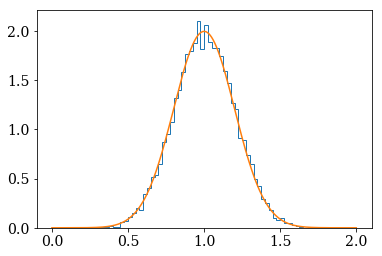

In [35]:
#PROBLEM 2
N = 10000
x = np.random.normal(loc=1.0, scale=0.2, size=N)
sigmaG2 = sigmaG(x)
binsize = 2.7*sigmaG2/(N**(1.0/3.0))
print binsize
bins = np.append(np.arange(start=0, stop=2, step=binsize), 2)
plt.hist(x, bins, histtype='step', density='True')
x2 = np.linspace(0, 2, 100000)
normalDist = norm.pdf(x2, 1.0, 0.2)
plt.plot(x2, normalDist)

20000
0.7836232886416131


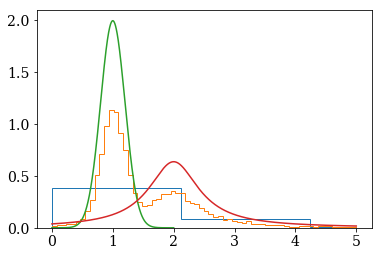

In [91]:
#PROBLEM 3
N = 10000
x = np.random.normal(loc=1.0, scale=0.2, size=N)
x2 = cauchy.rvs(loc=2.0, scale=0.5, size=N)
X = np.concatenate((x,x2), axis=0)
print len(X)
sigmaGX = sigmaG(X)
print sigmaGX
stddevX = np.std(X)
binsizeScott = 3.5*stddevX/(len(X)**(1.0/3.0))
binsizeFreedman = 2.7*sigmaGX/(len(X)**(1.0/3.0))
binsScott = np.append(np.arange(start=0, stop=5, step=binsizeScott), 5)
binsFreedman = np.append(np.arange(start=0, stop=5, step=binsizeFreedman), 5)
plt.hist(X, binsScott, histtype='step', density=True)
plt.hist(X, binsFreedman, histtype='step', density=True)
a = np.linspace(0, 2, 100000)
b = np.linspace(0,5, 100000)
normalDist = norm.pdf(a, 1.0, 0.2)
cauchyDist = cauchy.pdf(b, loc=2.0, scale=0.5)
plt.plot(a, normalDist)
plt.plot(b, cauchyDist)
#scott's rule fails because our distribution is no longer a gaussian, so the std. deviation is large

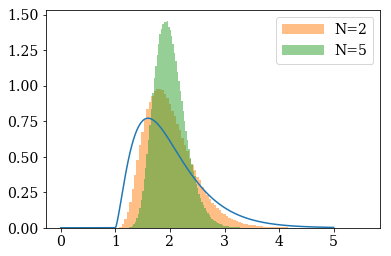

In [3]:
#PROBLEM 4
from scipy.stats import chi2
N=2
u = np.random.random(10000) * 5
u.sort()
dist = chi2(df=5,loc=1, scale = 0.2)
plt.plot(u,dist.pdf(u))

yy = []
for i in np.arange(1000000):
    xx = chi2.rvs(size=N, loc = 1, scale = 0.2, df=5)
    yy.append(np.mean(xx))
_1 = plt.hist(yy,bins=100,histtype='stepfilled', alpha=0.5, density=True, label='N=2')
N= 5
yy = []
for i in np.arange(1000000):
    xx = chi2.rvs(size=N, loc = 1, scale = 0.2, df=5)
    yy.append(np.mean(xx))
_2 = plt.hist(yy,bins=100,histtype='stepfilled', alpha=0.5, density=True, label='N=5')
plt.legend()